# Morphological Operators

In [ ]:
# import cv2, numpy and matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Create load_img() function that create and return a black image (600x600) that contains a white text 'ABCDE' with thickness = 25 and font scale = 5
def load_img():
  img = np.zeros((600, 600), dtype = np.uint8)
  font = cv2.FONT_HERSHEY_SIMPLEX
  img=cv2.putText(img, 'ABCDE', (50, 300), font, 5, (255, 255, 255), 25)
  return img

In [ ]:
# create display_img(img) function that takes as input an image and display it with cmap = 'gray'
def display_img(img):
  plt.imshow(img, cmap = 'gray')
  plt.show()

In [ ]:
# Call load_img() function to create img
img=load_img()

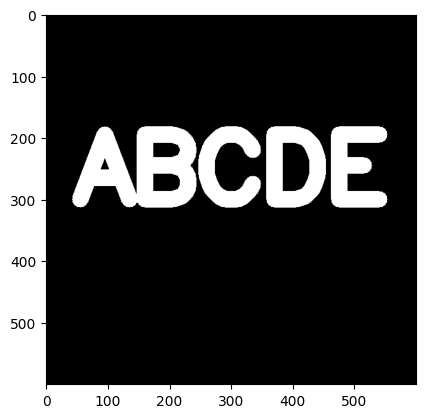

In [ ]:
# Call display_img(img) function to display img
display_img(img)

## Erosion

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

In [ ]:
# create a 5x5 kernel (ones)
# and apply the erosion operation to the image img with iterations = 1
kernel = np.ones((5, 5), dtype = np.uint8)
eroded_img = cv2.erode(load_img(), kernel, iterations = 1)


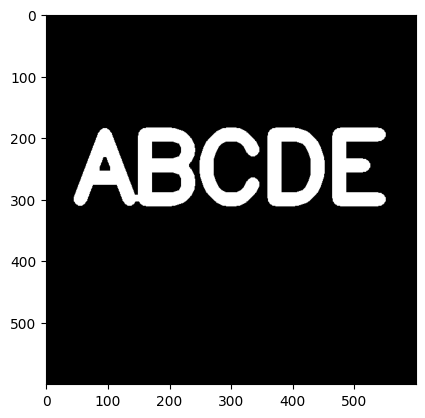

In [ ]:
# display the image using the created display_img function
display_img(eroded_img)

In [ ]:
# call load_img() that return the original img
# create a 5x5 kernel and apply the erosion operation to the image img with iterations = 4
load_img()
kernel = np.ones((5, 5), dtype = np.uint8)
eroded_img = cv2.erode(load_img(), kernel, iterations = 4)

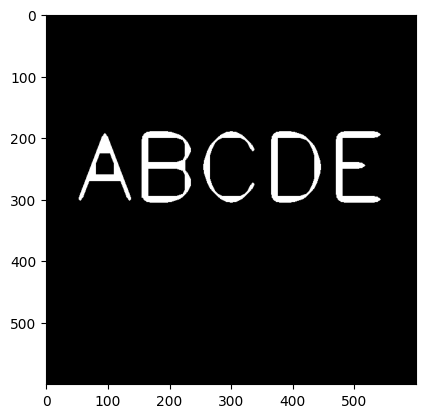

In [ ]:
# display_img
display_img(eroded_img)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

In [ ]:
# load_img again
img=load_img()

In [ ]:
# create the white_noise 600x600 matrix that contains zeros and ones randomly
white_noise = np.random.randint(0,2,(600,600))

In [ ]:
white_noise

array([[0, 1, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 1]])

In [ ]:
#multiply white_noise x 255
white_noise = white_noise*255

In [ ]:
white_noise.shape

(600, 600)

In [ ]:
img.shape

(600, 600)

In [ ]:
#Add the white_noise to the original image img (a simple + operator)
noise_img=img+white_noise
noise_img = noise_img.astype(np.uint8)

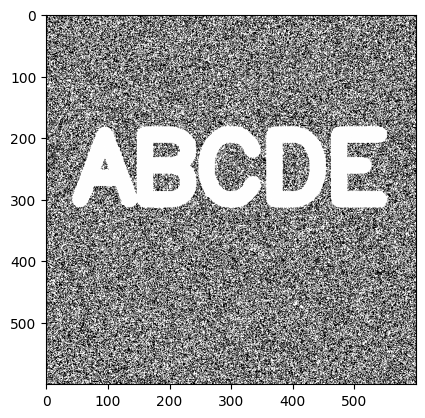

In [ ]:
# call display_img to display noise_img
display_img(noise_img)


In [ ]:
# using morphologyEx function, apply the open operation on the noised image
morph_img = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

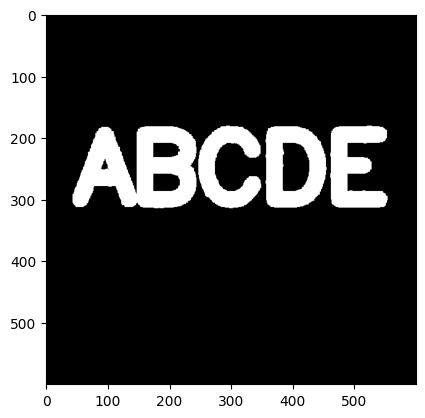

In [ ]:
#display_img
display_img(morph_img)

### Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
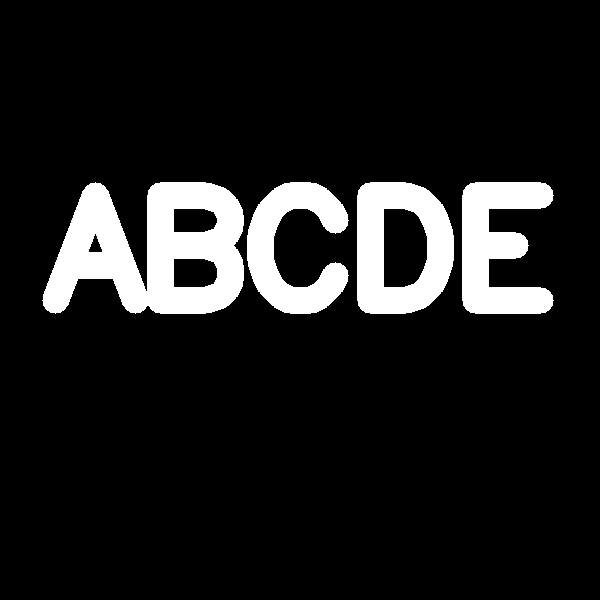

In [ ]:
# load_img again
load_img()

In [ ]:
# create the black_noise 600x600 matrix that contains zeros and ones randomly
black_noise = np.random.randint(0,2,(600,600))

In [ ]:
black_noise

array([[0, 1, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 0]])

In [ ]:
# multiply the black_noise by -255
black_noise = black_noise * (-255)

In [ ]:
# Add the black_noise to the original image img (a simple + operator)
black_noise_img = img + black_noise
black_noise_img = black_noise_img.astype(np.uint8)

array([[0, 1, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 0]], dtype=uint8)
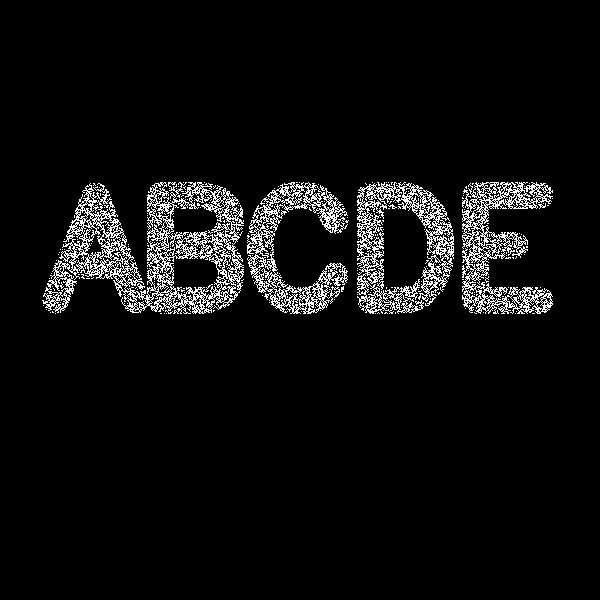

In [ ]:
black_noise_img

In [ ]:
# put all -255 pixels as zero
black_noise_img[np.where(black_noise_img == -255)] = 0

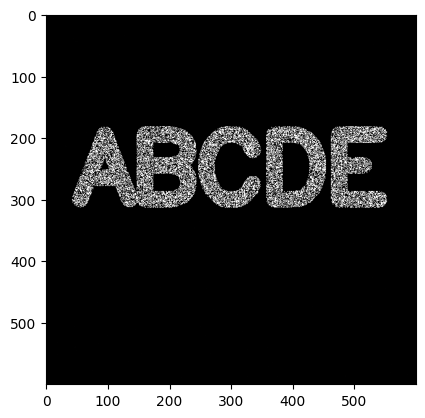

In [ ]:
#display_img
display_img(black_noise_img)

In [ ]:
# using morphologyEx function, apply the close operation on the noised image
black_noise_img = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)


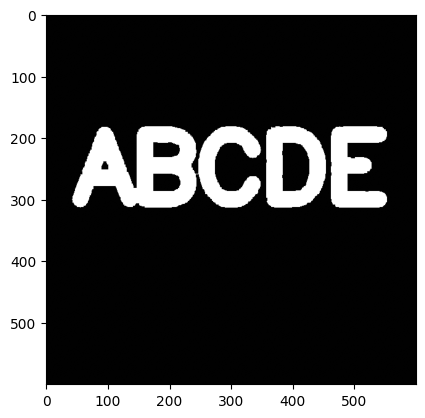

In [ ]:
#display_img
display_img(black_noise_img)

## Morphological Gradient

Difference between dilation and erosion of an image.

In [ ]:
#load_img
img=load_img()

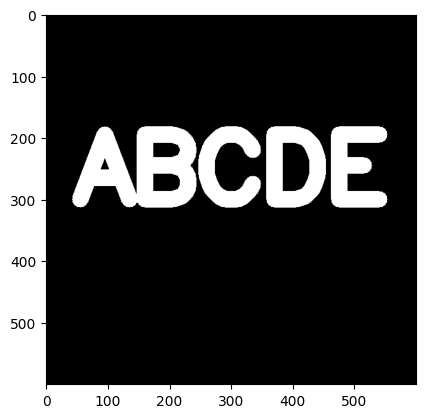

In [ ]:
#display_img
display_img(img)

In [ ]:
# using morphologyEx function, apply the MORPH_GRADIENT operation on the original image
img_gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)


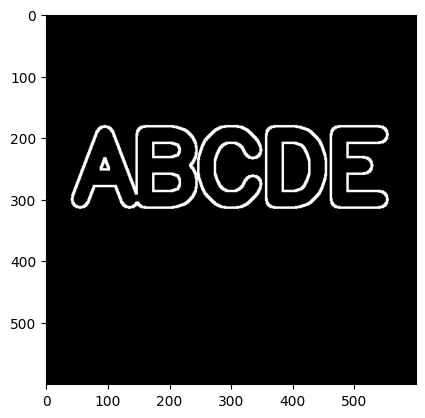

In [ ]:
#display_img
display_img(img_gradient)


In [ ]:
# Try to modify the kernel size and apply again open, close and MORPH_GRADIENT operations and compare the results
load_img()
kernel = np.ones((10, 10), dtype = np.uint8)
eroded_img = cv2.erode(load_img(), kernel, iterations = 4)

When the kernel size increases, the edges if the text became larger and thicker.
Kernel size controls the strength of morphological operations.
Larger kernel = stronger effect, removing/adding more. This can be useful for removing noise or emphasizing edges but might lose finer details.
Smaller kernel = gentler effect, preserving details. This is good for subtle changes but might not be as effective at removing larger noise.